In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


## Define states

In [3]:
iterable


<function iter>

<142157> Computing distances between samples, making a distance matrix ...
<142157> Computing associations (axis=0) between matrices (0/166) ...
<142158> Computing associations (axis=0) between matrices (1/166) ...
<142158> Computing associations (axis=0) between matrices (2/166) ...
<142158> Computing associations (axis=0) between matrices (3/166) ...
<142158> Computing associations (axis=0) between matrices (4/166) ...
<142159> Computing associations (axis=0) between matrices (5/166) ...
<142159> Computing associations (axis=0) between matrices (6/166) ...
<142159> Computing associations (axis=0) between matrices (7/166) ...
<142159> Computing associations (axis=0) between matrices (8/166) ...
<142200> Computing associations (axis=0) between matrices (9/166) ...
<142200> Computing associations (axis=0) between matrices (10/166) ...
<142200> Computing associations (axis=0) between matrices (11/166) ...
<142200> Computing associations (axis=0) between matrices (12/166) ...
<142201> Com

(                                              A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  \
 A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                      0.103069   
 A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                      0.165445   
 ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                     1.168601   
 AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                     1.195082   
 AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                       0.271459   
 BCP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                       0.120363   
 BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                       1.200645   
 BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                       0.839242   
 BL70_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                       1.173082   
 BV173_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                                      1.186368   

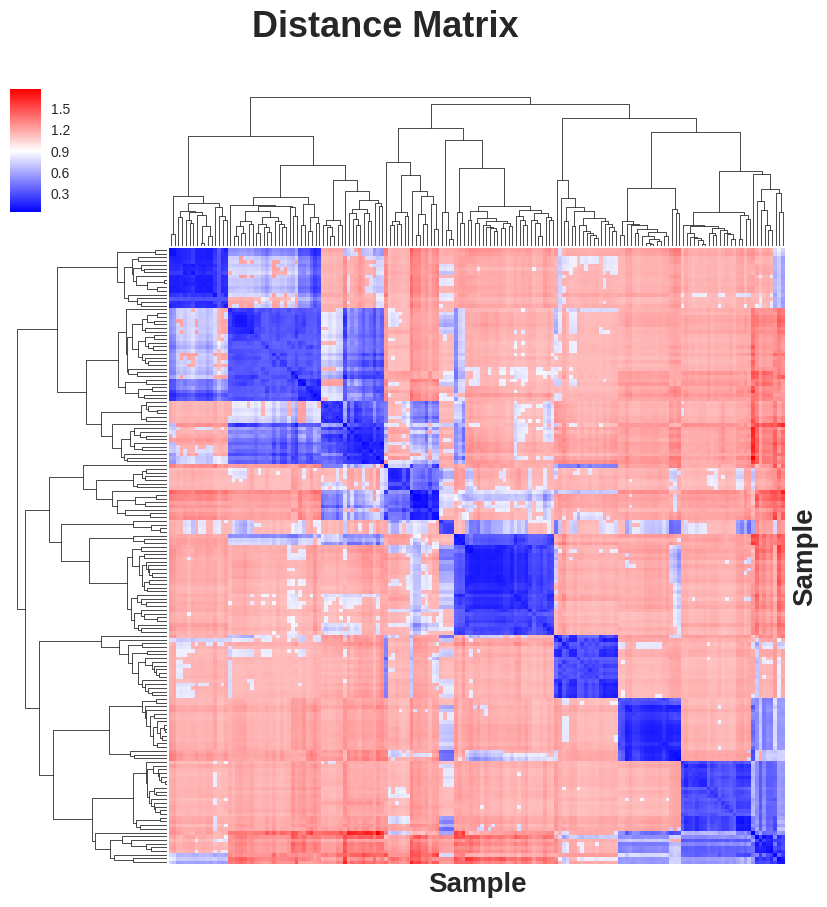

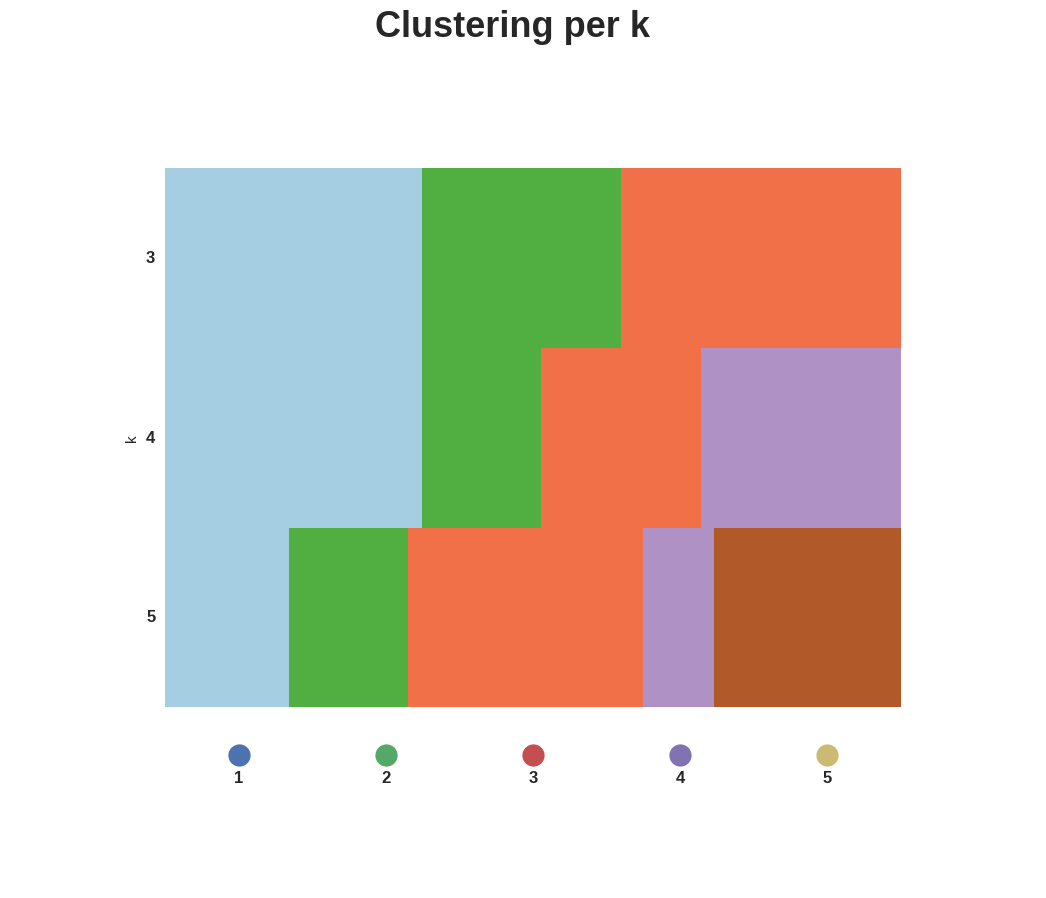

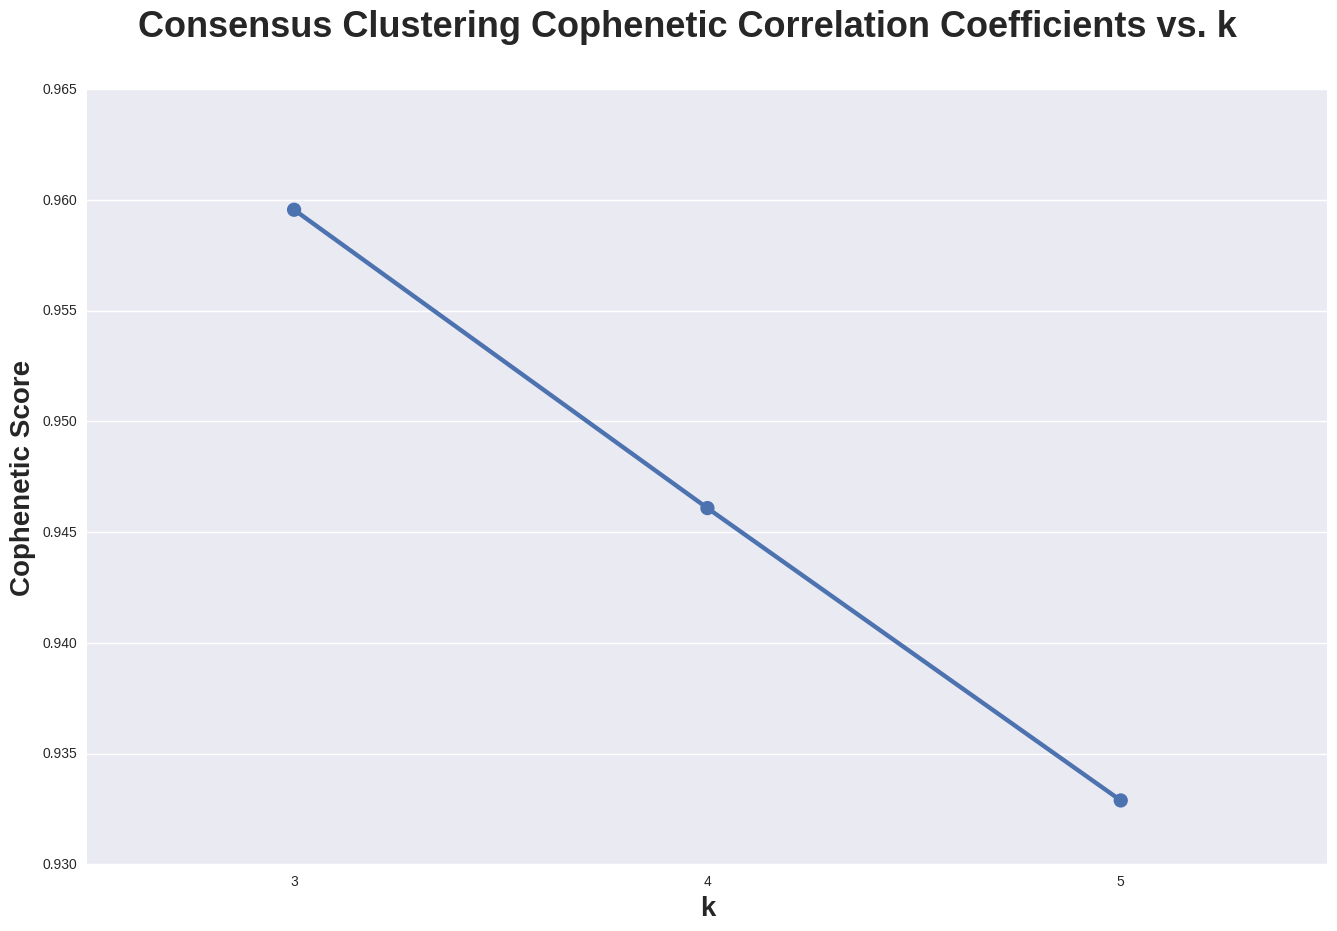

In [2]:
ccal.define_states('data/hema_nmf_k9_h.gct', [3,4,5])

In [2]:
h = ccal.support.read_gct('data/hema_nmf_k9_h.gct')
ks = [12]
# distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
#                                                                            ks,
#                                                                            n_clusterings=30,
#                                                                            max_std=5,
#                                                                            directory_path='result/define_states/')
distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
                                                                           ks,
                                                                           distance_matrix=ccal.read_gct('data/hema_k9_distance_matrix.gct'),
                                                                           n_clusterings=30,
                                                                           max_std=5)
state_labels = clusterings.ix[12, :]

OSError: File b'data/hema_k9_H.gct' does not exist

## Make Onco-GPS with real data

In [ ]:
colors = ['#CD96CD', '#5CACEE', '#43CD80', '#FFA500', '#CD5555', '#F0A5AB', '#9AC7EF', '#D6A3FC', '#FFE1DC',
          '#FAF2BE', '#F3C7F2', '#C6FA60', '#F970F9', '#FC8962', '#F6E370', '#F0F442', '#AED4ED', '#D9D9D9',
          '#FD9B85', '#7FFF00', '#FFB90F', '#6E8B3D', '#8B8878', '#7FFFD4', '#00008B', '#D2B48C', '#006400']

output = ccal.make_oncogps_map(h, state_labels, component_ratio=2,
                               colors=colors[:12], component_markeredgewidth=2.6)

In [ ]:
output = ccal.make_oncogps_map(h, state_labels, component_ratio=2,
                               colors='paper', component_markeredgewidth=2.6,
                               filepath='result/make_oncogps_map.pdf')

## Project samples

In [ ]:
# output = ccal.make_oncogps_map(h, state_labels)
n = 10

output1 = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                                testing_h_normalization='using_training',
                                title='Using Training')
output2 = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                                testing_h_normalization='using_training',
                                title='Using Training')

output = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                               testing_h_normalization='as_training',
                               title='As Training')
output = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                               testing_h_normalization='as_training',
                               title='As Training')

output = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels,
                               testing_h_normalization=None,
                               title='None')
output = ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n],
                               testing_h_normalization=None,
                               title='None')

try:
    output = ccal.make_oncogps_map(h, state_labels,
                                   testing_h=h, testing_states=state_labels,
                                   testing_h_normalization='foo')
except ValueError as e:
    print(e)

## Make Onco-GPS with random data

In [ ]:
for n_components in [3]:
    print('n_components:', n_components)
    for n_state in ks[::5]:
        print('n_state:', n_state)
        ccal.make_oncogps_map(h.iloc[:n_components, :], np.random.choice(list(range(1, n_state + 1)), h.shape[1]))
        ccal.make_oncogps_map(h.iloc[:n_components, :], np.random.choice(list(range(1, n_state + 1)), h.shape[1]), n_pulls=2)
        for annotation_type in ['continuous', 'categorical', 'binary']:
            print('annotation_type:', annotation_type)
            if annotation_type == 'continuous':
                annotation = np.random.random_sample(h.shape[1])
            elif annotation_type == 'categorical':
                annotation = np.random.choice(range(n_state), h.shape[1])
            elif annotation_type == 'binary':
                annotation = np.random.choice(range(2), h.shape[1])
            else:
                raise ValueError('Error in annotation_type.')
            ccal.make_oncogps_map(h.iloc[:n_components, :],
                                  np.random.choice(list(range(1, n_state + 1)), h.shape[1]),
                                  annotation=annotation,
                                  annotation_type=annotation_type)